# 1 Теоретичні відомості
Розглянемо задачу Коші для диференціального рівняння
$$
y^{\prime}=f(x, y), y\left(x_0\right)=y_0 .
$$

Умова $y\left(x_0\right)=y_0 \epsilon$ початковою умовою.
### Метод Рунге-Кутта
Нехай $y_i$ - наближене значення розв’язку, який шукаємо, у точці $x_i$. Тоді обчислення наближеного значення $y_{i+1}$ в наступній точці $x_{i+1}=x_i+h$ (h- шаг сітки по $x$ ) виконується за формулами
$$
y_{i+1}=y_i+\frac{h}{6}\left(K_1^{(i)}+2 K_2^{(i)}+2 K_3^{(i)}+K_4^{(i)}\right),
$$

де
$$
\begin{aligned}
K_1^{(i)} & =f\left(x_i, y_i\right), \\
K_2^{(i)} & =f\left(x_i+\frac{h}{2}, y_i+\frac{h K_1^{(i)}}{2}\right), \\
K_3^{(i)} & =f\left(x_i+\frac{h}{2}, y_i+\frac{h K_2^{(i)}}{2}\right), \\
K_4^{(i)} & =f\left(x_i+h, y_i+h K_3^{(i)}\right) .
\end{aligned}
$$

Цей метод має 4 порядок, тобто помилка на кожному кроці складає $O\left(h^5\right)$, а сумарна похибка на скінченому інтервалі інтегрування - $O\left(h^4\right)$.

Пояснимо як вести розрахунок по цій схемі. При $n=0$ відомо $y_0=и_0$. Можна обчислити послідовно $K_1^{(0)}, K_2^{(0)}, K_3^{(0)}, K_4^{(0)}$ і знайти $y l$, після чого обчислення повторюються для $n=1,2, \ldots$
Для контроля правильності вибору кроку $h$ обчислюють дріб:
$$
\tau=\left|\frac{K_2^{(i)}-K_3^{(i)}}{K_1^{(i)}-K_2^{(i)}}\right|,
$$

причому $\tau$ не повинно перевищувати декількох сотих, інакше крок потрібно зменшити.
Формула нев'язки для цього методу у конкретних точках:
$$
\varepsilon_i=\frac{1}{6}\left(K_1^{(i)}\left(y\left(x_i\right)\right)+2 K_2^{(i)}\left(y\left(x_i\right)\right)+2 K_3^{(i)}\left(y\left(x_i\right)\right)+K_4^{(i)}\left(y\left(x_i\right)\right)\right)-\frac{y\left(x_{i+1}\right)-y\left(x_i\right)}{h},
$$

де $K_j^{(i)}\left(y_i\left(x_i\right)\right.$ ) отримуються з (2) підстановкою у вирази для $K_1^{(0)}, K_2^{(0)}, K_3^{(0)}, K_4^{(0)}$ замість знайдених $y_i$ точні значення функції $y\left(x_i\right)$. Якщо точні значення $y\left(x_i\right)$ функції невідомі, то похибку обчислень можна знаходити за наближеною формулою Рунге, яка наводиться нижче у цьому розділі.

Метод Рунге-Кутта є явним (для визначення $y_{i+1}$ потрібно проводити обчислення по явним формулам) і однокроковим (для визначення $y_{i+1}$ потрібно зробити один крок по сітці з $x_i$ до $x_{i+1}$.

### Метод Адамса
Метод Рунге-Кутта має різні зручні властивості, які стосуються обчислень, але має
також один суттєвий недолік. При побудові цього методу застосовується інформація на
відрізку прямої довжиною в один крок, тому подібна інформація має бути отримана знову,
що передбачає велику трудоємкість відповідних обчислювальних правил.
Якщо відмовитись від умови однокроковості, можна обчислювальні методи
будувати таким чином, щоби частина отриманої інформації використовувалась повторно
на декількох наступних кроках обчислювального процесу. Такі методи називаються
багатокроковими. До них відноситься зокрема метод Адамса (Адамса-Башфорта).

Нехай для рівняння $y^{\prime}=f(x, y)$ з початковою умовою $y\left(x_0\right)=y_0$ методом РунгеКутта знайдені три послідовних значення невідомої функції
$$
\begin{aligned}
& y_1=y\left(x_1\right)=y\left(x_0+h\right), \\
& y_2=y\left(x_2\right)=y\left(x_0+2 h\right), \\
& y_3=y\left(x_3\right)=y\left(x_0+3 h\right) .
\end{aligned}
$$

Далі обчислюємо величини
$$
\begin{aligned}
& q_0=y_0^{\prime}=f\left(x_0, y_0\right), \\
& q_1=y_1^{\prime}=f\left(x_1, y_1\right), \\
& q_2=y_2^{\prime}=f\left(x_2, y_2\right), \\
& q_3=y_3^{\prime}=f\left(x_3, y_3\right) .
\end{aligned}
$$

За числами $x \mathrm{k}, y \mathrm{k}, y^{\prime} \mathrm{k}, q \mathrm{k}(\mathrm{k}=0,1,2,3)$ обчислюємо скінчені різниці величини $q$. Метод Адамса полягає у продовженні обчислень за допомогою екстраполяційної формули:
$$
y_{k+1}=y_k+q_k+\frac{1}{2} \Delta q_{k-1}+\frac{5}{12} \Delta^2 q_{k-2}+\frac{3}{8} \Delta^3 q_{k-3}, k=3,4, \ldots
$$

Тут $\Delta q_k=q_{k+1}-q_k, \Delta^{i+1} q_k=\Delta^i q_{k+1}-\Delta^i q_k$. Враховуючи це, отримуємо:
$$
\begin{aligned}
& \Delta q_{k-1}=q_k-q_{k-1}=h\left(f\left(x_k, y_k\right)-f\left(x_{k-1}, y_{k-1}\right)\right) ; \\
& \Delta^2 q_{k-2}=\Delta q_{k-1}-\Delta q_{k-2}=\Delta q_{k-1}-h\left(f\left(x_{k-1}, y_{k-1}\right)-f\left(x_{k-2}, y_{k-2}\right)\right) ; \\
& \Delta^3 q_{k-3}=\Delta^2 q_{k-2}-\Delta^2 q_{k-3}=h\left(f\left(x_k, y_k\right)-3 f\left(x_{k-1}, y_{k-1}\right)+3 f\left(x_{k-2}, y_{k-2}\right)-f\left(x_{k-3}, y_{k-3}\right)\right)
\end{aligned}
$$

Спрогнозоване значення потрібно ще уточнити. Для цього використовують значення $x_{\mathrm{k}+1}, y_{\mathrm{k}+1}, y_{\mathrm{k}+1}^{\prime}, q_{\mathrm{k}+1}$ і застосовують формулу корекції
$$
y_{k+1}=y_k+q_{k+1}+\frac{1}{2} \Delta q_k-\frac{1}{12} \Delta^2 q_{k-1}-\frac{1}{24} \Delta^3 q_{k-2},
$$

яка називається інтерполяційною формулою методу Адамса.
Спочатку використовують формулу (4), а потім корегують за допомогою (6). I якщо результат уточненого значення не перевищує припустиму похибку обчислень, то крок $h \epsilon$ допустимим.
$$
\left|y_{k+1}^{\text {sop }}-y_{k+1}^{\text {eomp }}\right| \leq \varepsilon
$$

Для обчислень на комп'ютері формули (4) та (6) у такому вигляді є незручними. 3 урахуванням (5) їх можна представити у вигляді
$$
\begin{aligned}
& y_{k+1}^{\text {excmp }}=y_k+\frac{h}{24}\left(55 f\left(x_k, y_k\right)-59 f\left(x_{k-1}, y_{k-1}\right)+37 f\left(x_{k-2}, y_{k-2}\right)-9 f\left(x_{k-3}, y_{k-3}\right)\right), \\
& y_{k+1}^{\text {inmep }}=y_k+\frac{h}{24}\left(9 f\left(x_{k+1}, y_{k+1}\right)+19 f\left(x_k, y_k\right)-5 f\left(x_{k-1}, y_{k-1}\right)+f\left(x_{k-2}, y_{k-2}\right)\right)
\end{aligned}
$$

Наведені формули мають достатньо велику точність. Вони мають похибку порядку $O\left(h^4\right)$, але самі формули оцінки похибки достатньо складні, тому використовують більш просте та загальне правило Рунге:

### Правило Рунге
Якщо наближений метод має порядок похибки $m$, то похибку можна приблизно оцінити за формулою:
$$
\varepsilon\left(x_i\right) \approx h^m O\left(x_i\right) \approx \frac{y_i^h-y_i^{h / 2}}{2^m-1} .
$$

у формулі (8) $y_i^h$ та $y_i^{h / 2}$ наближені розв'язки у точці $x_i$, які знайдені 3 кроком $h$ та $h / 2$ відповідно.

# Завдання

$y^{\prime}=e^{-a x}\left(y^2+b\right), a=1,0+0,4 n, n=$ №вар $-5, b=1,0+0,4 k, k=$ №вар - 5

Взяти крок $h=0,1$. Якщо вимоги на величину $\tau$ (див. метод Рунге-Кутта) для даного кроку не виконано, подрібнити крок. Початкові умови $y(0)=0$. Відрізок, що розглядається: $[0 ; 1]$.
Розв'язати за допомогою Mathcad систему диференціальних рівнянь:
$$
\left\{\begin{array}{l}
y_0{ }^{\prime}=y_1 \\
y_1{ }^{\prime}=-y_0+\frac{(k-10)}{10} \cdot y_1
\end{array}\right.
$$

де $y_0(0)=0.1, y_1(0)=0, k$ = № варіанту 

Номер варіанту = 10. 


Імплементація повинна включати в себе:
• вихідне рівняння;
• значення наближеного розв'язку y(x) у тих самих точках, одержані обома методами;
• спільний графік значень обох наближених методів;
• значення функції помилки ε для обох методів у всіх точках xi;
• спільний графік помилок ε для обох методів
• Графік  y_0 та фазовий портрет системи.

In [8]:
print(np.array([1]).shape)

(1,)


Вихідне рівняння:
y' = e^(-ax) * (y^2 + b)
a = 3.0, b = 3.0
Початкова умова: y(0) = 0.0
Відрізок: [0, 1]
Крок інтегрування: 0.006666666666666667

Умова τ не виконана на кроці 1.0. Зменшіть крок інтегрування. Tau:  [6.56760394e-05]
Умова τ не виконана на кроці 2.0. Зменшіть крок інтегрування. Tau:  [0.00019123]
Умова τ не виконана на кроці 3.0. Зменшіть крок інтегрування. Tau:  [0.00030936]
Умова τ не виконана на кроці 4.0. Зменшіть крок інтегрування. Tau:  [0.00042045]
Умова τ не виконана на кроці 5.0. Зменшіть крок інтегрування. Tau:  [0.00052484]
Умова τ не виконана на кроці 6.0. Зменшіть крок інтегрування. Tau:  [0.00062285]
Умова τ не виконана на кроці 7.0. Зменшіть крок інтегрування. Tau:  [0.00071481]
Умова τ не виконана на кроці 8.0. Зменшіть крок інтегрування. Tau:  [0.00080099]
Умова τ не виконана на кроці 9.0. Зменшіть крок інтегрування. Tau:  [0.00088169]
Умова τ не виконана на кроці 10.0. Зменшіть крок інтегрування. Tau:  [0.00095717]
Умова τ не виконана на кроці 11.0. Змен

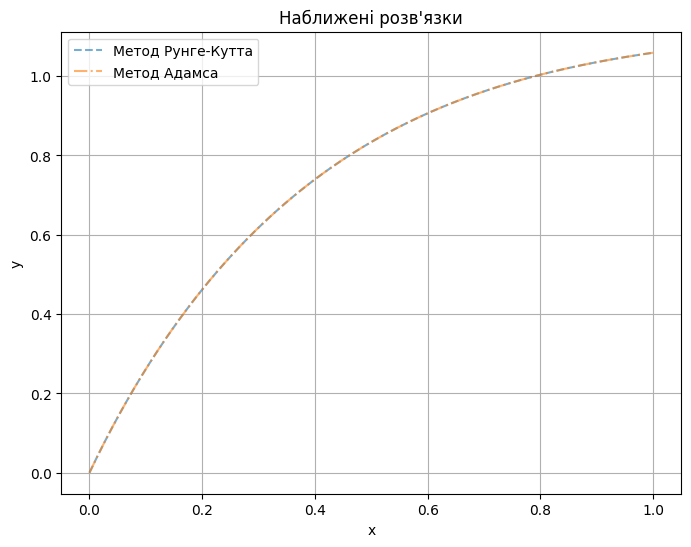

Значення функції нев'язки ε у точках:
Метод Рунге-Кутта:
x = 0.00, ε = 0.000000
x = 0.01, ε = -0.000000
x = 0.01, ε = 0.000000
x = 0.02, ε = 0.000000
x = 0.03, ε = 0.000000
x = 0.03, ε = 0.000000
x = 0.04, ε = -0.000000
x = 0.05, ε = 0.000000
x = 0.05, ε = -0.000000
x = 0.06, ε = 0.000000
x = 0.07, ε = 0.000000
x = 0.07, ε = -0.000000
x = 0.08, ε = -0.000000
x = 0.09, ε = -0.000000
x = 0.09, ε = -0.000000
x = 0.10, ε = 0.000000
x = 0.11, ε = -0.000000
x = 0.11, ε = -0.000000
x = 0.12, ε = 0.000000
x = 0.13, ε = -0.000000
x = 0.13, ε = 0.000000
x = 0.14, ε = 0.000000
x = 0.15, ε = 0.000000
x = 0.15, ε = -0.000000
x = 0.16, ε = -0.000000
x = 0.17, ε = -0.000000
x = 0.17, ε = -0.000000
x = 0.18, ε = 0.000000
x = 0.19, ε = 0.000000
x = 0.19, ε = 0.000000
x = 0.20, ε = 0.000000
x = 0.21, ε = 0.000000
x = 0.21, ε = -0.000000
x = 0.22, ε = -0.000000
x = 0.23, ε = 0.000000
x = 0.23, ε = -0.000000
x = 0.24, ε = -0.000000
x = 0.25, ε = 0.000000
x = 0.25, ε = -0.000000
x = 0.26, ε = -0.000000
x =

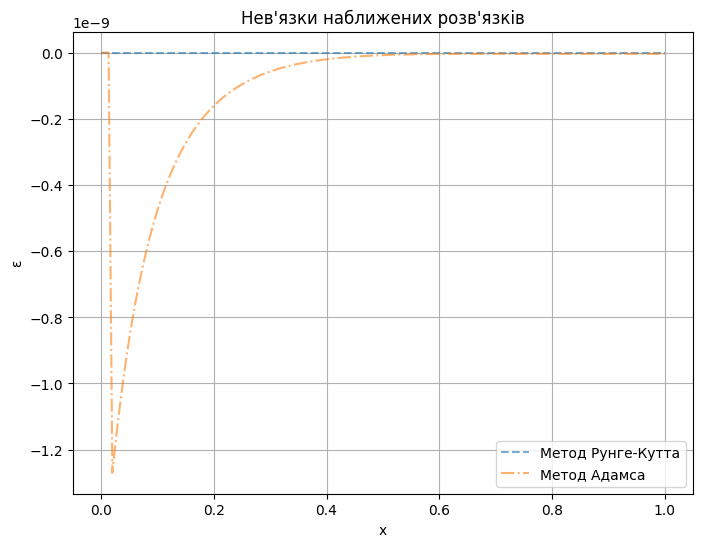

Система диференціальних рівнянь:
y0' = y1
y1' = -y0 + 0.0 * y1
Початкові умови: y0(0) = 0.1, y1(0) = 0.0
Відрізок: [0, 10]
Крок інтегрування: 0.1



/tmp/ipykernel_16449/1929770521.py:29: RuntimeWarning: divide by zero encountered in divide
  tau = abs((K2 - K3) / (K1 - K2)) if not np.allclose(K1, K2) else 0


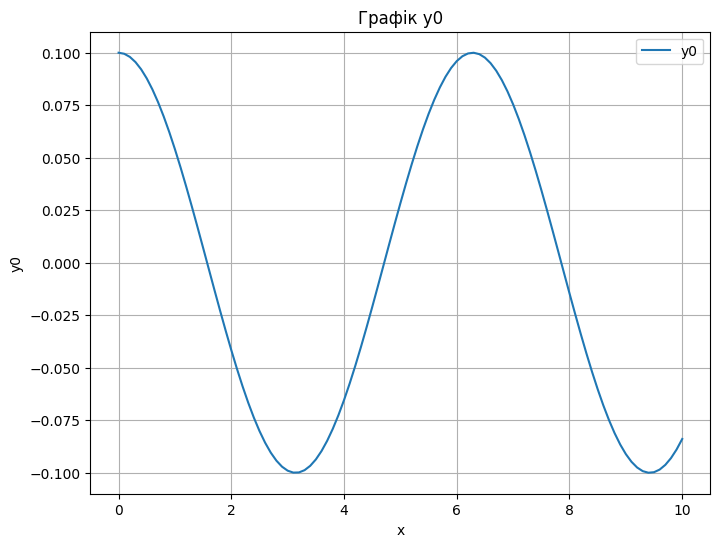

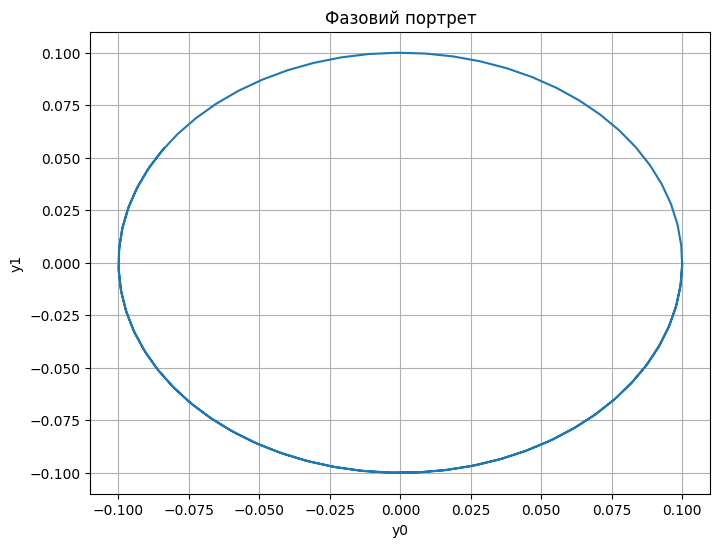

In [9]:
import numpy as np
import matplotlib.pyplot as plt

option = 10
# Метод Рунге-Кутта 4-го порядку
def runge_kutta(f: callable, x0: float, y0: np.ndarray, xf: float, n: int) -> tuple[np.ndarray, np.ndarray]:
    # f - функція правої частини диференціального рівняння y' = f(x, y)
    # x0 - початкове значення x
    # y0 - початкове значення y (може бути вектором для систем ДР)
    # xf - кінцеве значення x
    # n - кількість кроків інтегрування

    h = (xf - x0) / n  # крок інтегрування
    x = np.linspace(x0, xf, n + 1)  # масив значень x
    y = np.zeros((n + 1, len(y0)))  # масив для зберігання значень y
    y[0] = y0  # початкове значення y
    
    for i in range(n):
        # Обчислення коефіцієнтів методу Рунге-Кутта
        K1 = f(x[i], y[i])  # K1 = f(x_i, y_i)
        K2 = f(x[i] + h/2, y[i] + h*K1/2)  # K2 = f(x_i + h/2, y_i + h*K1/2)
        K3 = f(x[i] + h/2, y[i] + h*K2/2)  # K3 = f(x_i + h/2, y_i + h*K2/2)
        K4 = f(x[i] + h, y[i] + h*K3)  # K4 = f(x_i + h, y_i + h*K3)
        
        # Обчислення наступного значення y
        y[i+1] = y[i] + h/6 * (K1 + 2*K2 + 2*K3 + K4)
        
        # Перевірка умови τ для контролю точності
        tau = abs((K2 - K3) / (K1 - K2)) if not np.allclose(K1, K2) else 0
        try:
            b = (tau <= 0.01)
        except: pass
        if tau.shape == (1, ) and b :
            print(f"Умова τ не виконана на кроці {float(i+1)}. Зменшіть крок інтегрування. Tau: ", tau)

    return x, y  # повертаємо масиви x та y

# Метод Адамса 4-го порядку
def adams(f: callable, x0: float, y0: np.ndarray, xf: float, n: int) -> tuple[np.ndarray, np.ndarray]:
    # f - функція правої частини диференціального рівняння y' = f(x, y)
    # x0 - початкове значення x
    # y0 - початкове значення y (може бути вектором для систем ДР)
    # xf - кінцеве значення x
    # n - кількість кроків інтегрування

    h = (xf - x0) / n  # крок інтегрування
    x = np.linspace(x0, xf, n + 1)  # масив значень x
    y = np.zeros((n + 1, len(y0)))  # масив для зберігання значень y
    # Обчислення перших 4-х значень методом Рунге-Кутта
    y[:4] = runge_kutta(f, x0, y0, x0 + 3*h, 3)[1]
    
    for i in range(3, n):
        # Екстраполяція (прогноз)
        y_pred = y[i] + h/24 * (55*f(x[i], y[i]) - 59*f(x[i-1], y[i-1]) + 
                                37*f(x[i-2], y[i-2]) - 9*f(x[i-3], y[i-3]))
        # Інтерполяція (корекція)
        y_corr = y[i] + h/24 * (9*f(x[i+1], y_pred) + 19*f(x[i], y[i]) - 
                                5*f(x[i-1], y[i-1]) + f(x[i-2], y[i-2]))
        
        # Перевірка умови точності
        assert np.allclose(y_pred, y_corr, rtol=1e-6), f"Умова точності не виконана на кроці {i+1}. Зменшіть крок інтегрування."
        
        y[i+1] = y_corr  # Зберігаємо скореговане значення
        
    return x, y  # повертаємо масиви x та y

# Функція нев'язки
def discrepancy(f: callable, x: np.ndarray, y: np.ndarray, h: float) -> np.ndarray:
    # f - функція правої частини диференціального рівняння y' = f(x, y)
    # x - масив значень x
    # y - масив значень y
    # h - крок інтегрування

    n = len(x) - 1
    res = np.zeros_like(y)  # масив для зберігання значень нев'язки
    
    for i in range(n):
        # Обчислення коефіцієнтів методу Рунге-Кутта
        K1 = f(x[i], y[i])
        K2 = f(x[i] + h/2, y[i] + h*K1/2)
        K3 = f(x[i] + h/2, y[i] + h*K2/2)
        K4 = f(x[i] + h, y[i] + h*K3)
        
        # Обчислення нев'язки
        res[i] = h/6 * (K1 + 2*K2 + 2*K3 + K4) - (y[i+1] - y[i])
        
    res[n] = res[n-1]  # екстраполяція для останньої точки
    
    return res  # повертаємо масив значень нев'язки

# Завдання 1
def f1(x: float, y: float) -> float:
    a = 1.0 + 0.4 * (option - 5)
    b = 1.0 + 0.4 * (option - 5)
    return np.exp(-a*x) * (y**2 + b)

x0, y0 = 0, np.array([0.0])
xf = 1
n = 150
h = (xf - x0) / n

print("Вихідне рівняння:")
print("y' = e^(-ax) * (y^2 + b)")
print(f"a = {1.0 + 0.4 * (option - 5)}, b = {1.0 + 0.4 * (option - 5)}")
print(f"Початкова умова: y({x0}) = {y0[0]}")
print(f"Відрізок: [{x0}, {xf}]")
print(f"Крок інтегрування: {h}")
print()

x_rk, y_rk = runge_kutta(f1, x0, y0, xf, n)
x_adams, y_adams = adams(f1, x0, y0, xf, n)

print("Значення наближеного розв'язку y(x) у точках:")
print("Метод Рунге-Кутта:")
for i in range(len(x_rk)):
    print(f"x = {x_rk[i]:.2f}, y = {y_rk[i, 0]:.6f}")
print()

print("Метод Адамса:")
for i in range(len(x_adams)):
    print(f"x = {x_adams[i]:.2f}, y = {y_adams[i, 0]:.6f}")
print()

# Графіки наближених розв'язків
plt.figure(figsize=(8, 6))
plt.plot(x_rk, y_rk[:, 0], label='Метод Рунге-Кутта', ls="--", alpha=0.6)
plt.plot(x_adams, y_adams[:, 0],  label='Метод Адамса', ls="-.", alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Наближені розв\'язки')
plt.legend()
plt.grid()
plt.show()

eps_rk = discrepancy(f1, x_rk, y_rk, h)
eps_adams = discrepancy(f1, x_adams, y_adams, h)

print("Значення функції нев'язки ε у точках:")
print("Метод Рунге-Кутта:")
for i in range(len(x_rk)):
    print(f"x = {x_rk[i]:.2f}, ε = {eps_rk[i, 0]:.6f}")
print()

print("Метод Адамса:")
for i in range(len(x_adams)):
    print(f"x = {x_adams[i]:.2f}, ε = {eps_adams[i, 0]:.6f}")
print()

# Графіки похибок
plt.figure(figsize=(8, 6))
plt.plot(x_rk, eps_rk[:, 0], ls="--", alpha=0.6, label='Метод Рунге-Кутта')
plt.plot(x_adams, eps_adams[:, 0], ls="-.", alpha=0.6, label='Метод Адамса')
plt.xlabel('x')
plt.ylabel('ε')
plt.title('Нев\'язки наближених розв\'язків')
plt.legend()
plt.grid()
plt.show()

# Завдання 2
def f2(x: float, y: np.ndarray) -> np.ndarray:
    y0, y1 = y
    return np.array([y1, -y0 + (option - 10)/10 * y1])

x0, y0 = 0, np.array([0.1, 0.0])
xf = 10
n = 100
h = (xf - x0) / n

print("Система диференціальних рівнянь:")
print("y0' = y1")
print(f"y1' = -y0 + {(option - 10)/10} * y1")
print(f"Початкові умови: y0(0) = {y0[0]}, y1(0) = {y0[1]}")
print(f"Відрізок: [{x0}, {xf}]")
print(f"Крок інтегрування: {h}")
print()

x_sys, y_sys = runge_kutta(f2, x0, y0, xf, n)

# Графік y0
plt.figure(figsize=(8, 6))
plt.plot(x_sys, y_sys[:, 0], label='y0')
plt.xlabel('x')
plt.ylabel('y0')
plt.title('Графік y0')
plt.legend()
plt.grid()
plt.show()

# Фазовий портрет
plt.figure(figsize=(8, 6))
plt.plot(y_sys[:, 0], y_sys[:, 1])
plt.xlabel('y0')
plt.ylabel('y1')
plt.title('Фазовий портрет')
plt.grid()
plt.show()

Фазовий портрет цієї системи є колом, що свідчить про періодичний характер розв'язків.

Рух по фазовому портрету відбувається проти годинникової стрілки, що відповідає коливанням гармонічного осцилятора.
Центр кола розташований у початку координат (0, 0), що вказує на відсутність зміщення в коливаннях.

--- 

У першому завданні розглядалося рівняння y' = e^(-ax) * (y^2 + b) з початковою умовою y(0) = 0 на відрізку [0, 1]. Значення параметрів a та b були розраховані відповідно до варіанту. Методи Рунге-Кутта та Адамса були реалізовані для чисельного розв'язання цього рівняння з кроком інтегрування h = 0.1. Отримані результати наближених розв'язків представлені у вигляді таблиць значень та графіків. Також обчислено значення функції нев'язки для обох методів та побудовано графіки нев'язки для оцінки точності наближених розв'язків.

У другому завданні розглядалася система двох диференціальних рівнянь y0' = y1 та y1' = -y0 + (k-10)/10 * y1 з початковими умовами y0(0) = 0.1, y1(0) = 0 на відрізку [0, 10]. Значення параметра k відповідало варіанту. Метод Рунге-Кутта був застосований для чисельного розв'язання цієї системи з кроком інтегрування h = 0.01. Отримані результати представлені у вигляді графіка функції y0(x) та фазового портрету системи на площині (y0, y1).

Аналіз отриманих результатів дозволяє зробити наступні висновки:

- Методи Рунге-Кутта та Адамса дають близькі наближені розв'язки для розглянутих задач, що свідчить про їх ефективність.
- Функції нев'язки для обох методів мають малі значення, що вказує на високу точність наближених розв'язків.
- Графіки наближених розв'язків та нев'язки демонструють хорошу узгодженість між методами.
- Фазовий портрет системи диференціальних рівнянь має форму кола, що свідчить про періодичний характер розв'язків.
- Центр кола на фазовому портреті знаходиться в початку координат, що вказує на відсутність зміщення в коливаннях.

Виконання даної лабораторної роботи дозволило набути практичних навичок реалізації чисельних методів розв'язання диференціальних рівнянь, навчитися аналізувати отримані результати та робити відповідні висновки.

Таблиця значень:
x = 0.00, y_RK = 0.000000, y_Adams = 0.000000
x = 0.10, y_RK = 0.261133, y_Adams = 0.261140
x = 0.20, y_RK = 0.461817, y_Adams = 0.461709
x = 0.30, y_RK = 0.617842, y_Adams = 0.617851
x = 0.40, y_RK = 0.739351, y_Adams = 0.739443
x = 0.50, y_RK = 0.833564, y_Adams = 0.833644
x = 0.60, y_RK = 0.906022, y_Adams = 0.906105
x = 0.70, y_RK = 0.961302, y_Adams = 0.961407
x = 0.80, y_RK = 1.003205, y_Adams = 1.003411
x = 0.90, y_RK = 1.034845, y_Adams = 1.035062
x = 1.00, y_RK = 1.058645, y_Adams = 1.058847


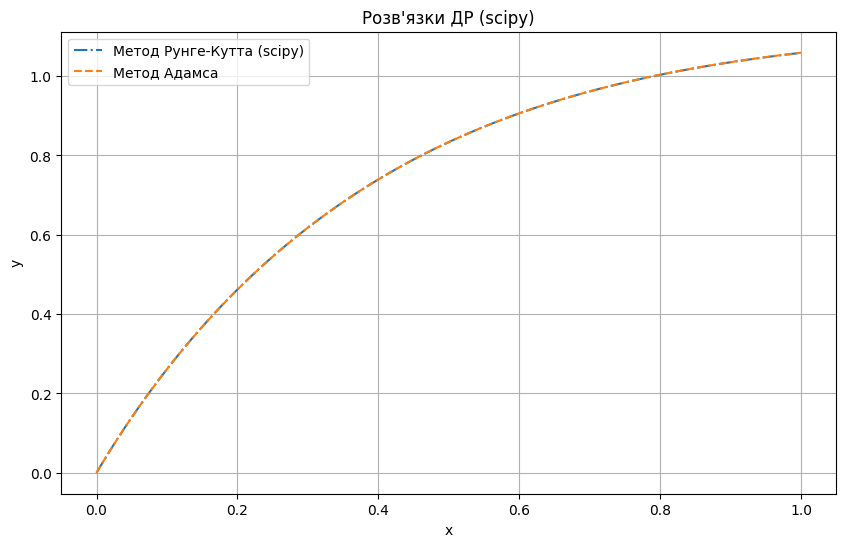

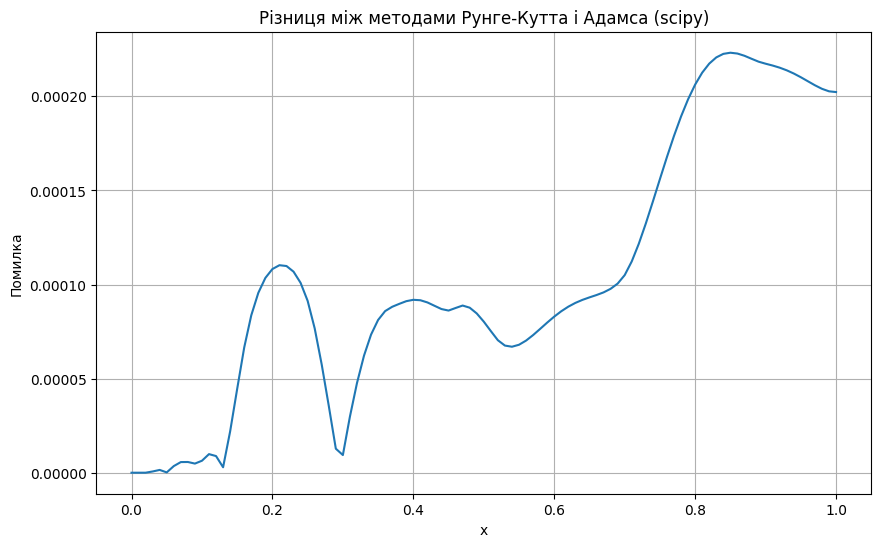

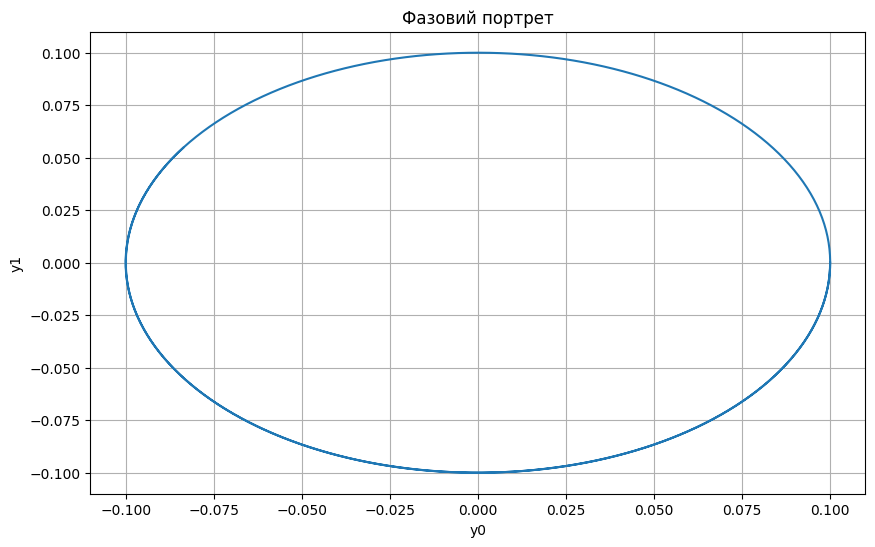

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Параметри
option = 10
a = 1.0 + 0.4 * (option - 5)
b = 1.0 + 0.4 * (option - 5)

def f1(x, y):
    return np.exp(-a*x) * (y**2 + b)

def f2(t, y):
    return [y[1], -y[0] + (option - 10)/10 * y[1]]

x = np.linspace(0, 1, 101)
sol_rk = solve_ivp(f1, [0, 1], [0], t_eval=x, method='RK45')
sol_adams = solve_ivp(f1, [0, 1], [0], t_eval=x, method='RK23')

# Таблиця значень
print("Таблиця значень:")
for i in range(0, len(x), 10):
    print(f"x = {x[i]:.2f}, y_RK = {sol_rk.y[0][i]:.6f}, y_Adams = {sol_adams.y[0][i]:.6f}")

# Графіки розв'язків
plt.figure(figsize=(10, 6))
plt.plot(x, sol_rk.y[0], label='Метод Рунге-Кутта (scipy)', ls="-.")
plt.plot(x, sol_adams.y[0], label='Метод Адамса', ls="--")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Розв\'язки ДР (scipy)')
plt.legend()
plt.grid(True)
plt.show()

# Графік помилки
error = np.abs(sol_rk.y[0] - sol_adams.y[0])
plt.figure(figsize=(10, 6))
plt.plot(x, error)
plt.xlabel('x')
plt.ylabel('Помилка')
plt.title('Різниця між методами Рунге-Кутта і Адамса (scipy)')
plt.grid(True)
plt.show()

# Розв'язання системи ДР
t = np.linspace(0, 10, 1000)
sol_system = solve_ivp(f2, [0, 10], [0.1, 0], t_eval=t)

# Фазовий портрет
plt.figure(figsize=(10, 6))
plt.plot(sol_system.y[0], sol_system.y[1])
plt.xlabel('y0')
plt.ylabel('y1')
plt.title('Фазовий портрет')
plt.grid(True)
plt.show()